# Classifying MNIST dataset with multiple machine learning methods
<font color='grey' size='1.5'> Created by Parisa Hosseinzadeh for *Protein Engineering and Design*, Spring 2021, updated Winter 2022

MNIST (Modified National Institute of Standards and Technology) database is one of the most commonly used databases for training learning methods. It consists of 60,000 training images and 10,000 test images of handwritten digits. You can learn more about this database [here](https://en.wikipedia.org/wiki/MNIST_database).

Below you may see an example of images in this dataset: <br>
<img src='https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png'>

## Method 1. Logistic Regression using scikit-learn

Logistic regression sounds simple, but it is a very powerful method for classification of data. You can learn more about logistic regression [here](https://machinelearningmastery.com/logistic-regression-for-machine-learning/).

In this part of our tutorial, we will work on using logistic regression on MNIST dataset. The steps of this tutorial are adopted from [this source](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)

In [1]:
#@title Loading MNIST dataset
#@markdown Let's load the dataset and see how many
#@markdown inputs we have

#@markdown <font color='red'> NOTE: This will take a few minutes.

from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print('Number of inputs are:', 
      mnist.data.shape[0],
      '\n',
      'and number of features are (28x28 images):',
      mnist.data.shape[1])
# These are the labels
print('Number of labels are:', 
      mnist.target.shape[0])

Number of inputs are: 70000 
 and number of features are (28x28 images): 784
Number of labels are: 70000


In [2]:
#@title Step2. Splitting into training and test set
#@markdown The common norm of MNIST is to keep 
#@markdown 60,000 images for training and 
#@markdown 10,000 for testing

from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
 mnist.data, mnist.target, test_size=1/7.0, random_state=0)

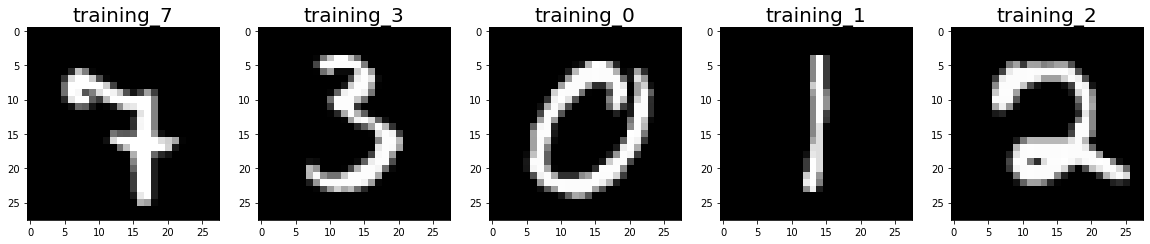

In [3]:
#@markdown Let's take a look at some of these
#@markdown images and their labels.

import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index in range(5):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(
     np.array(list(train_img[0:5].iloc[index])), 
     (28,28)), cmap=plt.cm.gray)
 plt.title("training_{}".format(list(train_lbl[0:5])[index]), 
           fontsize = 20)

### Step3. Setting up the model and its parameters

It is now time to setup our model. We will be using [logistic regression from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). As you can see in the provided link, there are multiple parameters one can tune to control the behavior of the model. For large datasets like MNIST, parameter tuning and knowing what each parameter does is key. 

We'll try with a set of parameteres (mostly default) for our first round.

In [4]:
#@title Step3. Setting up the model and its parameters

#@markdown It is now time to setup our model. 
#@markdown  We will be using [logistic regression from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 
#@markdown As you can see in the provided link, 
#@markdown there are multiple parameters one can tune to control the behavior of the model. 
#@markdown For large datasets like MNIST, parameter tuning and knowing what each parameter does is key. 

#@markdown We'll try with a set of parameteres (mostly default) for our run.

# Importing the model
from sklearn.linear_model import LogisticRegression

solver = 'saga'#@param {type:"string"}
tol = 1e-4 #@param {type:"number"}
max_iter = 200 #@param {type:"number"}

#@markdown - `solver` defines the method used for gradient descent.
#@markdown - `tol` Tolerance for stopping criteria.
#@markdown - `mex_iter` Maximum number of iteration.


# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = solver,
                                  tol=tol,
                                  max_iter=max_iter)

In [5]:
#@title Step4. Fitting
#@markdown This is when the solver starts optimizing and fitting the training set.

#@markdown <font color='red'> NOTE: This will take a few minutes.

# When you run this, it will give a warning about convergence
# ignore it 
logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(max_iter=200, solver='saga')

In [6]:
#@title Step5. Prediction and assessment
#@markdown After fitting is done, 
#@markdown we run our model on the test set 
#@markdown and make predictions and then assess our model.

#@markdown There are multiple ways to measure how your model works. 
#@markdown Some of the common measures are:
#@markdown - precision
#@markdown - recall
#@markdown - F1 score
#@markdown - accuracy

#@markdown You can define which score you're interested in within the function.
#@markdown For simplicity, we will use accuracy here.

# Returns a NumPy Array
# Predict for One Observation (image)
predictions = logisticRegr.predict(test_img)

score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9186


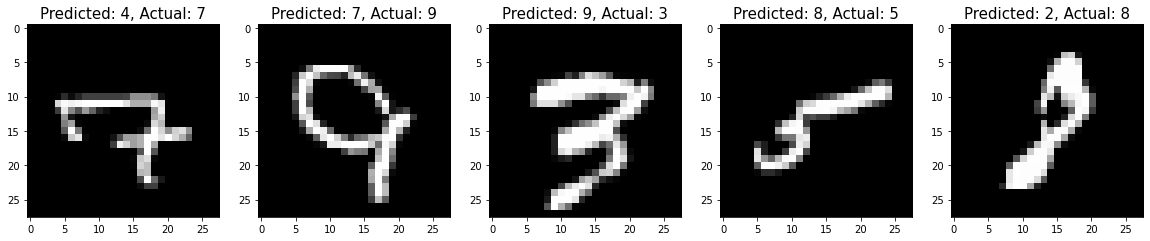

In [7]:
#@title Step5. Looking at some misclassified images
#@markdown Just to get a sense of what is it that the network is missing.

import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
  if label != predict: 
    misclassifiedIndexes.append(index)
  index +=1

plt.figure(figsize=(20,4))
i=0
for badIndex in misclassifiedIndexes[0:5]:
 plt.subplot(1, 5, i + 1)
 plt.imshow(np.reshape(
     np.array(list(test_img[:].iloc[badIndex])), 
     (28,28)), cmap=plt.cm.gray)
 plt.title("Predicted: {}, Actual: {}".format(
     list(predictions[:])[badIndex], 
     list(test_lbl[:])[badIndex]), 
     fontsize = 15)
 i+=1

## Method 2. Vanilla neural net

In this part of the tutorial, we will use a simple neural net to train the same dataset and will compare its performance with our logistic regression.

We will use keras as a module to build our neural net. This part of tutorial is adopted from [this source](https://victorzhou.com/blog/keras-neural-network-tutorial/).

In [8]:
#@title Step1. Importing necessary files and modules

from keras.datasets import mnist

import numpy as np
from tensorflow import keras

In [9]:
#@title Step2. Preparing training and tes sets from data
#@markdown For better performance, 
#@markdown we will also normalize the data. 
#@markdown To prepare data for the neural net, 
#@markdown some image flattening and reshaping is required.

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [10]:
#@title Step3. Building our neural net model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [11]:
#@title Step4. Compiling the model and training
#@markdown During compilation, 
#@markdown we decide on a set of parameters to use
#@markdown during optimization. 
#@markdown After the parameters are set, 
#@markdown we can start training.

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

from tensorflow.keras.utils import to_categorical

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3640 - accuracy: 0.8922
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1989 - accuracy: 0.9395
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1517 - accuracy: 0.9534
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1298 - accuracy: 0.9599
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1123 - accuracy: 0.9657


In [12]:
#@title Step5. Testing the model
#@markdown We're using accuracy as a measure.

model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 1s 1ms/step - loss: 0.1217 - accuracy: 0.9611


[0.1217183992266655, 0.9610999822616577]